#### [ 이미지 변환 - 회전 및 대칭]
-	데이터 부족시 데이터 증가를 위해 사용함
-	대칭 : 좌우 상화 flip()
-	회전 : 지정된 각도로 돌리기 getRotationMatric2

[1] 모듈 로딩 및 데이터 준비 <hr>

In [45]:
# 컴퓨터 비전 모듈
import cv2
# 이미지 데이터 저장 모듈
import numpy as np
# 시각화 모듈 
import matplotlib.pyplot as plt
# 파일,폴더,경로 관련 모듈
import os

In [46]:
# [1-2] 데이터 준비

IMG_DIR = '../image/'
FILE_NAME ='image3.png'


In [47]:
# 이미지 읽어 오기
# 로딩 : 경로 + 파일명
color_img = cv2.imread( IMG_DIR+FILE_NAME, cv2.IMREAD_COLOR)

# [이미지 좌우상하 대칭]


In [48]:
# 정보확인

if color_img.size > 0:
	#print(f'{ FILE_NAME}')
	#print(f'{color_img}\n ')
	print(f'형태:{color_img.shape},\n차원:{color_img.ndim}D')
else:
	print(f'{FILE_NAME}')
	print(f'형태 :{color_img.shape}')

형태:(702, 876, 3),
차원:3D


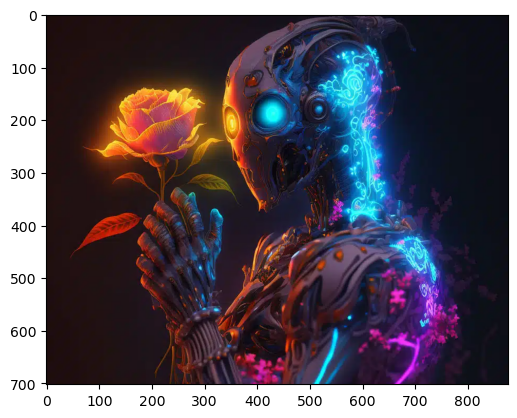

In [49]:
# 이미지 확인
rgb_IMG = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_IMG)
plt.show()

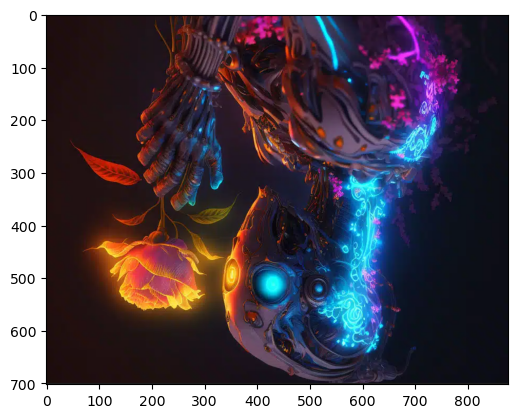

In [50]:
# 상하대칭
top_downIMG = cv2.flip(color_img, 0)

plt.imshow(cv2.cvtColor(top_downIMG, cv2.COLOR_BGR2RGB))
plt.show()

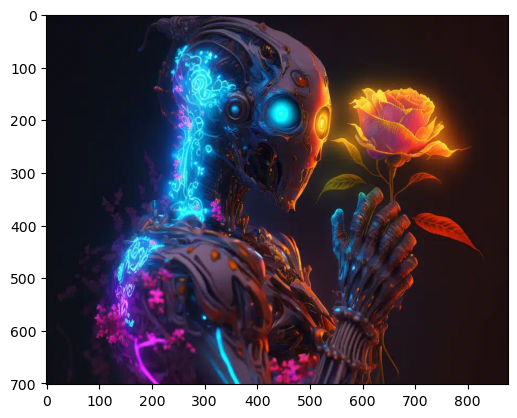

In [51]:
# 좌우 대칭
top_downIMG = cv2.flip(color_img, 1)

plt.imshow(cv2.cvtColor(top_downIMG, cv2.COLOR_BGR2RGB))
plt.show()

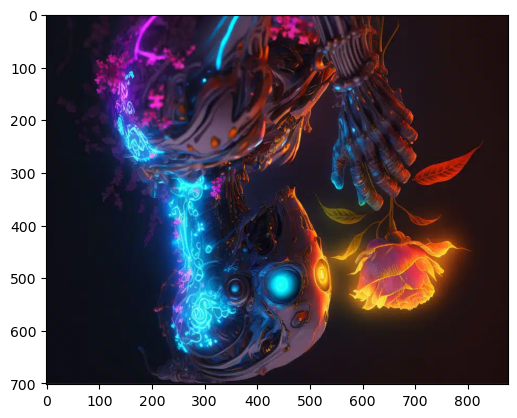

In [52]:
# 상하좌우 대칭
top_downIMG = cv2.flip(color_img, -1)

plt.imshow(cv2.cvtColor(top_downIMG, cv2.COLOR_BGR2RGB))
plt.show()

# [4] 이미지 회전 <hr>

In [74]:
# 이미지에서 자를 크기 지정

H, W, _ = color_img.shape
print(f'현재 범위 :{H},{W}')
# 자르코 싶은 크기

X,Y, nW, nH = 300,00,350,350


# 가능한 
# 자를 수 있는지 검증
isValid = (X + nW <= W) and (Y + nH <= H)
print(f'가능한 범위 {isValid}')

현재 범위 :702,876
가능한 범위 True


In [75]:
# - 원하는 부분 즉, ROI 추출
# X, Y, nW, nH = 150,120,150,120
roi_img= color_img[Y:Y+nH,X:X+nW]

print(roi_img.shape)

(350, 350, 3)


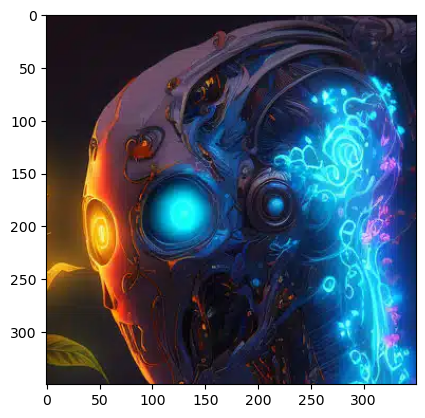

In [76]:
## - 자른 부분 시각화

plt.imshow(cv2.cvtColor(roi_img, cv2.COLOR_BGR2RGB))
plt.show()

[4] 이미지 회전 <hr>

-	회전 행렬 추출 단계 : getRotationMatrix2D(중심좌표, 회전각도, 확대/축소)
-	변화 단계 : warpAffine(원본이미지, 회전행렬,(행,열))

In [72]:
# [4-1] 회전행열 추출

H,W,_ = color_img.shape

# 회전 중심 좌표
center = (W , H)  # (x, y) 좌표
center2 = (W / 2, H / 2)  # (x, y) 좌표

# 45도 회전, 크기 0.5배로 설정
rm45 = cv2.getRotationMatrix2D(center2, 45, 0.75)

# 변환 행렬 크기 출력
print(f'rm45 shape: {rm45.shape}')  # (2,3) 출력
print(rm45)  # 변환 행렬 출력

rm45 shape: (2, 3)
[[  0.53033009   0.53033009  19.56956223]
 [ -0.53033009   0.53033009 397.13871747]]


 rm45.shape (702, 876, 3)


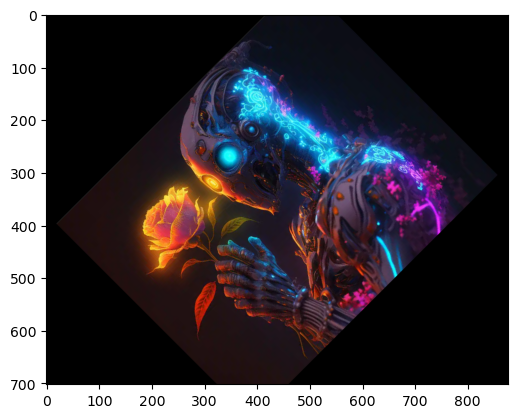

In [73]:
# [4-2] 이미지 변환

rm45_img = cv2.warpAffine(color_img, rm45,(W,H))

print(f' rm45.shape {rm45_img.shape}')

plt.imshow(cv2.cvtColor(rm45_img, cv2.COLOR_BGR2RGB))
plt.show()

In [58]:
# [3-1] 이미지 축소
# 		이미지 데이터, (축소w, h)
down_image = cv2.resize(color_img,(100,100), interpolation=cv2.INTER_AREA)

print(f'형태 {down_image.shape}, 차원 {down_image.ndim}D')

형태 (100, 100, 3), 차원 3D


In [59]:
# [3-2] 이지미 확대 => 보간법 : cv2.INTER , cv2.INTER_CUBIC
# 이미지 데이터
up_image = cv2.resize(color_img,(850,850), interpolation=cv2.INTER_AREA)

print(f'형태 {up_image.shape}, 차원 {up_image.ndim}D')

형태 (850, 850, 3), 차원 3D


In [60]:
# [3-3] 축소,원본, 확대

cv2.imshow('origin', color_img) 
cv2.imshow('small', down_image) 
cv2.imshow('big', up_image) 
                         

# 이벤트처리
cv2.waitKey()
cv2.destroyAllWindows()

[3] OpenCV => matploylib 출력 <hr> 

In [61]:
# 시각화 기능 함수
def drawImage(row, col, imgList):
	fig, axes = plt.subplots(row,col)
	axes = axes.flatten() if col >=2 else [axes]

	for ax,img in zip(axes, imgList):
		ax.imshow(img)
		ax.set_title(f'{img.shape}')
		
	plt.tight_layout()
	plt.show()

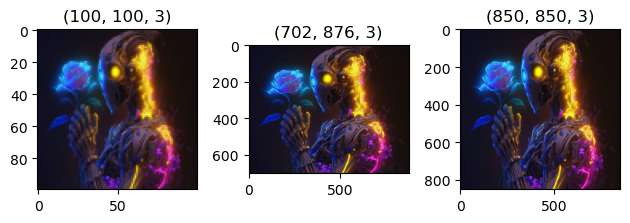

In [62]:
## 시각화
drawImage(1,3, [down_image,color_img,up_image])

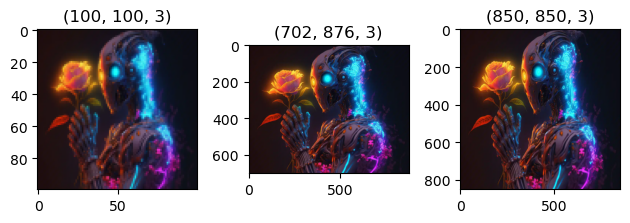

In [63]:
# -------------------------------------------------------
# opencv 채널순서 BGR ==> 일반 채널 순서 RGB 변환
# 	cv2.cvtColor(이미지 데이터, 변형형식)

down_image = cv2.cvtColor(down_image, cv2.COLOR_RGB2BGR)
color_img = cv2.cvtColor(color_img, cv2.COLOR_RGB2BGR)
up_image = cv2.cvtColor(up_image, cv2.COLOR_RGB2BGR)

## 시각화
drawImage(1,3, [down_image,color_img,up_image])

[5] 상대적 크기 이미지 축소/확대 <hr>

In [64]:
# [5-0] 현재 이미지 크기

H,W, _ = color_img.shape

print(f'현재 이미지 H : {H}, W: {W}')

현재 이미지 H : 702, W: 876


In [65]:
## [5-1] 이미지 축소 => 보관법 : cv2.INTER_AREA
#	이미지 데이터, (0,0) , fx=int(w*0.5), fy = int(H*0.5)

down_IMG = cv2.resize(color_img,  dsize= (0,0), fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)

print(f'형태 : {down_IMG .shape}, 차원 :{down_IMG.ndim}D')



형태 : (1404, 1752, 3), 차원 :3D


In [66]:
## [5-2] 이미지 축소 => 보관법 : cv2.INTER_AREA
#	이미지 데이터, (0,0) , fx=int(w*0.5), fy = int(H*0.5)

up_IMG = cv2.resize(color_img, dsize= (0,0), fx=1.5, fy=1.2, interpolation=cv2.INTER_CUBIC)

print(f'형태 : {up_IMG.shape}, 차원 :{up_IMG.ndim}D')

형태 : (842, 1314, 3), 차원 :3D


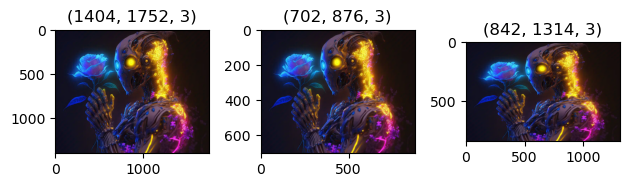

In [67]:
# -------------------------------------------------------
# opencv 채널순서 BGR ==> 일반 채널 순서 RGB 변환
# 	cv2.cvtColor(이미지 데이터, 변형형식)

down_IMG = cv2.cvtColor(down_IMG, cv2.COLOR_RGB2BGR)
color_img = cv2.cvtColor(color_img, cv2.COLOR_RGB2BGR)
up_IMG  = cv2.cvtColor(up_IMG , cv2.COLOR_RGB2BGR)

## 시각화
drawImage(1,3, [down_IMG,color_img,up_IMG])